In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import tensorflow as tf
import lightgbm as lgb
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import skew
from scipy.special import boxcox1p


In [2]:
df = pd.read_csv('new_data_frame.csv').drop(['Unnamed: 0'], axis=1).sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,название,цена,год,модель,пробег,тип двигателя,объем двигателя,коробка передач,кузов,привод,л.с,состаяние
0,toyota,980000,2013,camry,157000,бензин,2.5,at,седан,передний,181,не битый
1,chevrolet,280000,2010,aveo,120000,бензин,1.4,at,седан,передний,101,не битый
2,volkswagen,236000,2001,passat,400000,бензин,1.8,at,седан,передний,170,не битый
3,ваз,37550,1990,2108,230000,бензин,1.3,mt,хетчбэк,передний,64,не битый
4,kia,735000,2010,sportage,224500,бензин,2.0,at,внедорожник,передний,150,не битый


In [4]:
price = df['цена']

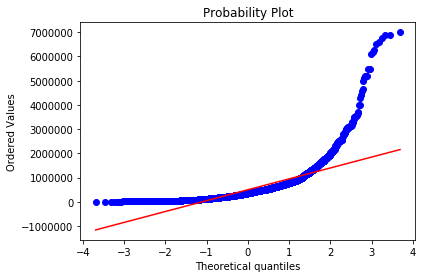

In [5]:
fig = plt.figure()
res = sp.stats.probplot(df['цена'], plot=plt)
plt.show()

In [6]:
df["цена"] = np.log1p(df["цена"])

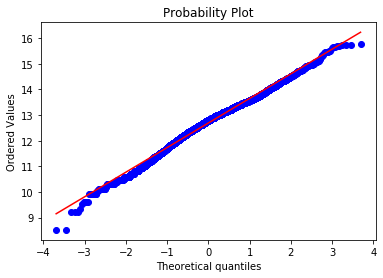

In [7]:
fig = plt.figure()
res = sp.stats.probplot(df['цена'], plot=plt)
plt.show()

In [8]:
df['кузов'][df['кузов'] == 'пикап'] = 'прочее'
df['кузов'][df['кузов'] == 'микроавтобус'] = 'прочее'
df['кузов'][df['кузов'] == 'купе'] = 'прочее'
df['кузов'][df['кузов'] == 'кабриолет'] = 'прочее'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [9]:
df.corr()

,цена,год,пробег,объем двигателя,л.с
цена,1.000000,0.607473,-0.196520,0.447060,0.614110
год,0.607473,1.000000,-0.373064,-0.013304,0.170181
пробег,-0.196520,-0.373064,1.000000,0.123431,0.071126
объем двигателя,0.447060,-0.013304,0.123431,1.000000,0.811474
л.с,0.614110,0.170181,0.071126,0.811474,1.000000


In [10]:
df.describe()

,цена,год,пробег,объем двигателя,л.с
count,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000
mean,12.691424,2007.355437,156978.739109,1.951097,128.675379
std,0.964165,7.681765,94431.815363,0.715529,59.566527
min,8.517393,1949.000000,1.000000,0.600000,23.000000
25%,12.100718,2004.000000,94000.000000,1.600000,89.000000
50%,12.793862,2008.000000,146754.500000,1.600000,112.000000
75%,13.329379,2012.000000,200000.000000,2.100000,149.000000
max,15.761421,2020.000000,1000000.000000,5.800000,650.000000


In [11]:
df['год'][df['год'] < 1988] = 1988
df['год'][df['год'] == 2019] = 2020
df['год'][df['год'] < 1996] = 1996

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [12]:
df['модель'].value_counts()

focus                145
kalina               116
priora               114
camry                100
rio                   96
                    ... 
c30                    1
alto                   1
shuma                  1
vivaro                 1
-benz c-класс amg      1
Name: модель, Length: 735, dtype: int64

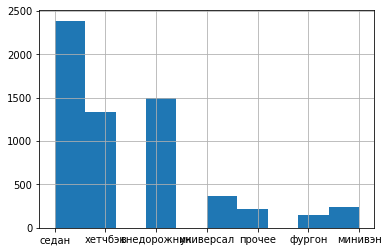

In [13]:
h = df['кузов'].hist()
fig = h.get_figure()

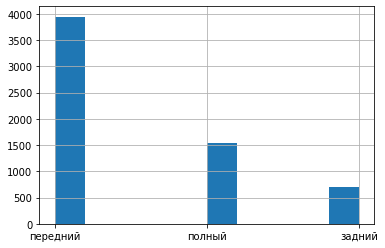

In [14]:
h = df['привод'].hist()
fig = h.get_figure()

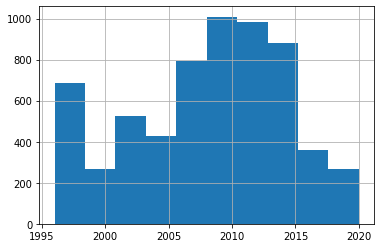

In [15]:
h = df['год'].hist()
fig = h.get_figure()

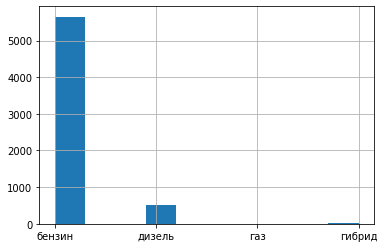

In [16]:
h = df['тип двигателя'].hist()
fig = h.get_figure()

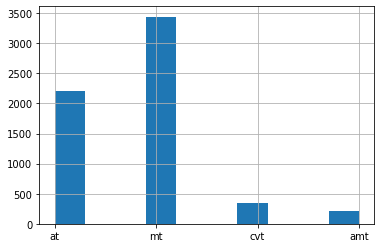

In [17]:
h = df['коробка передач'].hist()
fig = h.get_figure()

In [18]:
df['коробка передач'][df['коробка передач'] == 'amt'] = 'cvt'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


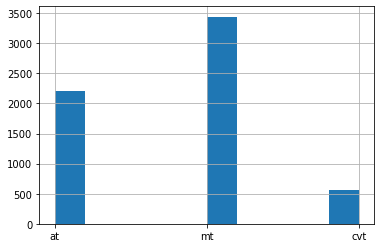

In [19]:
h = df['коробка передач'].hist()
fig = h.get_figure()

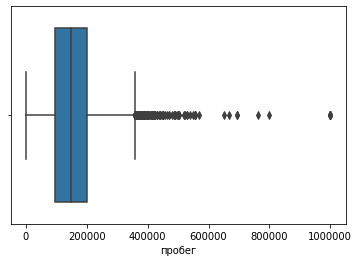

In [20]:
ax = sns.boxplot(x=df["пробег"])

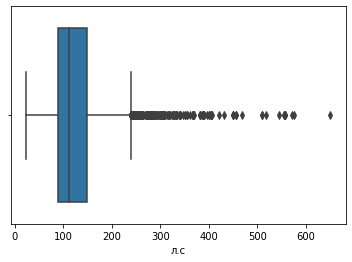

In [21]:
ax = sns.boxplot(x=df["л.с"])

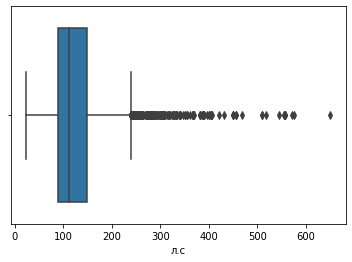

In [22]:
ax = sns.boxplot(x=df["л.с"])

In [23]:
Y = np.array(df['цена'])
df = df.drop(['цена'], axis=1)
numeric_feats = df.dtypes[df.dtypes != "object"].index

In [24]:
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'отклонение' :skewed_feats})

In [25]:
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

In [26]:
d = pd.get_dummies(df)

In [27]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [28]:
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(d)
rmse= np.sqrt(cross_val_score(model_lgb, d, Y, cv = kf))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [29]:
print("\nScore: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))


Score: 0.9471 (0.0022)

